<a href="https://colab.research.google.com/github/jjayli/my-data-science/blob/main/notebooks/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**"파이썬으로 캘리포니아 집값 예측하기: 데이터 시각화부터 머신러닝까지"**

# California Housing Prices


대상 데이터: 1990년 캘리포니아 인구 조사 데이터를 사용.(위도, 경도, 방 개수, 인구 수, 중간 소득 등)

시각화의 중요성: 단순히 숫자만 보면 알 수 없는 패턴(해안가 근처가 비싸다, 대도시 주변이 비싸다 등)을 Scatter Plot으로 시각화하여 직관적으로 제시.

모델링: RandomForestRegressor를 사용하여 비선형적인 데이터의 패턴을 학습.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [12]:
# 1. 데이터 로드 및 DataFrame 변환
# Scikit-Learn에 내장된 캘리포니아 주택 데이터.
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target_Price'] = california.target  # 타겟(집값, 단위: $100,000) 추가

print(f"데이터 크기: {df.shape}")
print(df.head())

데이터 크기: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target_Price  
0    -122.23         4.526  
1    -122.22         3.585  
2    -122.24         3.521  
3    -122.25         3.413  
4    -122.25         3.422  



--- 2. 지리적 데이터 시각화 (지도 그리기) ---


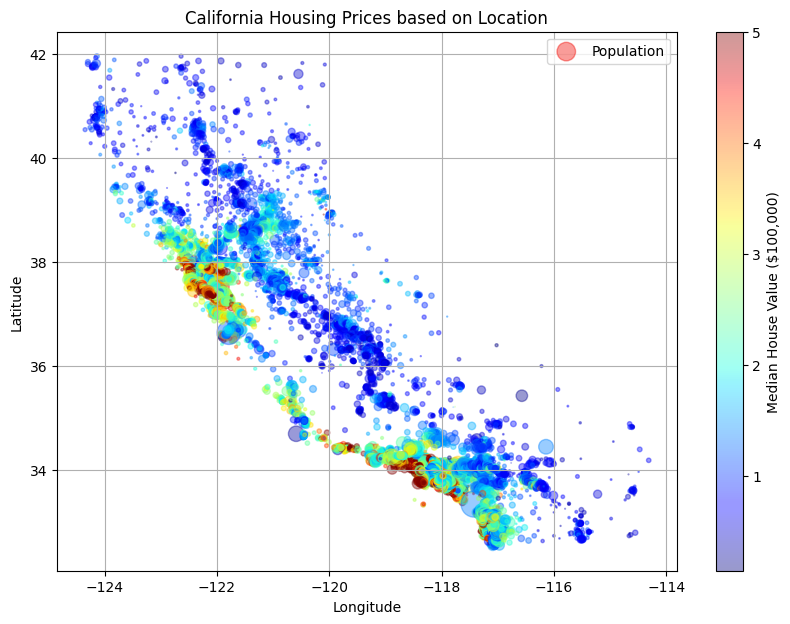

In [3]:
# 2. 데이터 시각화 (지리적 특성 파악)
# 위도(Latitude)와 경도(Longitude)를 사용하여 집값의 분포를 지도로 나타냄.
# alpha: 투명도 (데이터가 겹치는 곳을 확인하기 위함)
# c: 색상 기준 (집값), cmap: 컬러맵 (jet 사용), s: 점의 크기 (인구수 비례)
plt.figure(figsize=(10, 7))
plt.scatter(df['Longitude'], df['Latitude'],
            alpha=0.4,
            c=df['Target_Price'], cmap='jet',
            s=df['Population']/100, label='Population')

plt.colorbar(label='Median House Value ($100,000)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices based on Location')
plt.legend()
plt.grid(True)
plt.show()

지도를 보면 샌프란시스코와 로스앤젤레스 같은 해안가 대도시 주변의 집값이 붉은색(고가)으로 나타나는 것을 확인. 이는 위치 정보가 집값에 결정적인 역할을 한다는 것을 시사.

In [8]:
# 3. 데이터 분할 (Train 80% / Test 20%)
X = df.drop('Target_Price', axis=1)
y = df['Target_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"학습 데이터: {X_train.shape}, 테스트 데이터: {X_test.shape}")

학습 데이터: (16512, 8), 테스트 데이터: (4128, 8)


In [9]:
# 4. 머신러닝 모델 학습 (Random Forest)
# 랜덤 포레스트는 여러 개의 결정 트리(Decision Tree)를 만들어 평균을 내는 앙상블 기법. 과적합을 방지하고 높은 성능.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

단순 선형 회귀 대신 랜덤 포레스트를 사용한 이유는
집값은 단순히 방 개수에 비례해서 오르는 것이 아니라 위치, 소득 등 여러 복합적인 요인이 비선형적으로 작용.

In [10]:
# 5. 모델 평가 및 예측 결과 확인
y_pred = model.predict(X_test)

# R2 Score: 1에 가까울수록 모델이 데이터를 잘 설명함.
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Score (결정 계수): {score:.4f}")
print(f"MSE (평균 제곱 오차): {mse:.4f}")

R2 Score (결정 계수): 0.8051
MSE (평균 제곱 오차): 0.2554


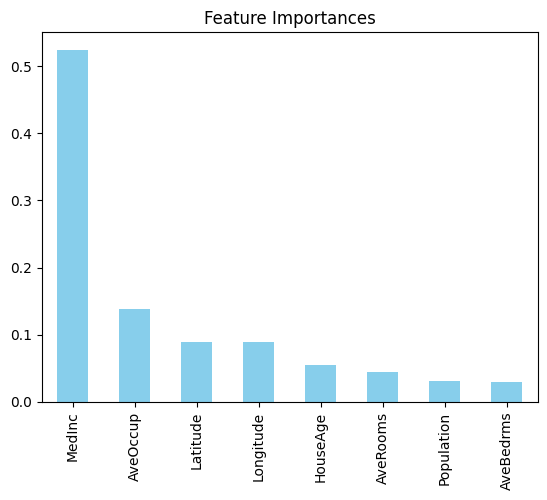

In [11]:
# 6. 특성 중요도 확인
# 집값에 가장 큰 영향을 미치는 요인이 무엇인지 확인.
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importances')
plt.show()

Feature Importances 그래프를 보면 중간 소득이 집값 예측에 가장 중요한 변수임을 알 수 있음.
즉, 부유한 사람들이 모여 사는 동네의 집값이 비싸다는 상식이 데이터로 확인 가능.